<a href="https://colab.research.google.com/github/ahamedafzal/Heart_Disease/blob/main/Framingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Data sets/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [2]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
df["education"].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [5]:
df["education"]=df["education"].fillna(df["education"].mode()[0])
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].mode()[0])
df["BPMeds"]=df["BPMeds"].fillna(df["BPMeds"].mode()[0])
df["totChol"]=df["totChol"].fillna(df["totChol"].mode()[0])
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())
df["heartRate"]=df["heartRate"].fillna(df["heartRate"].mode()[0])
df["glucose"]=df["glucose"].fillna(df["glucose"].mode()[0])

In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
X=df.drop(["education","TenYearCHD"],axis=1)
y=df.iloc[:,-1]

In [8]:
X.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)

In [11]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
Y_pred=knn.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1])

**SVC**

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       0.67      0.01      0.02       193

    accuracy                           0.85      1272
   macro avg       0.76      0.50      0.47      1272
weighted avg       0.82      0.85      0.78      1272



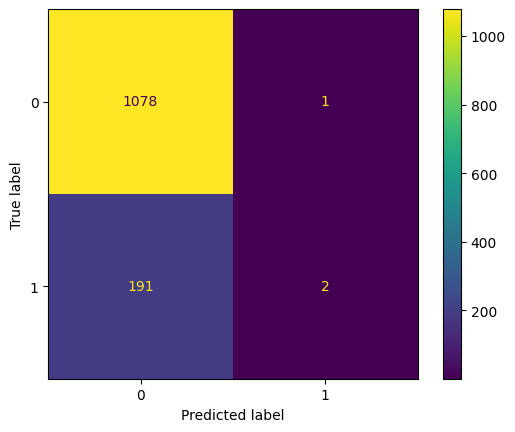

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

**KNeighborsClassifier**

              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1079
           1       0.26      0.13      0.17       193

    accuracy                           0.81      1272
   macro avg       0.56      0.53      0.53      1272
weighted avg       0.77      0.81      0.79      1272



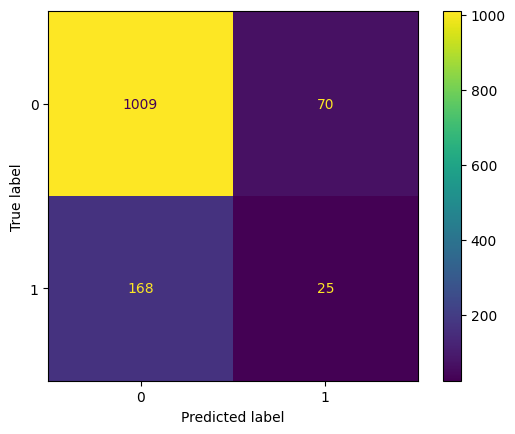

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(ConfusionMatrixDisplay.from_predictions(y_test,Y_pred))
print(classification_report(y_test,Y_pred))